1. Begin (or restart) part "'3(a)" of the TUT Demo and interact with a ChatBot to make sure you understand howeach part the Monte Hall problem code above works

The specific code is explained as follows:

Initial setting:

all_door_options = (1, 2, 3) defines three door options (1, 2, 3), one of which has a prize behind it and the other doors have goats behind them.

my_door_choice = 1 means that the contestant always chooses the first door at the beginning.

i_won = 0 is used to count the number of times the prize is won.

reps = 100000 indicates the number of simulation repetitions, and 100,000 simulations are run here.

Simulation process:

Each simulation randomly selects a door with a prize through secret_winning_door = np.random.choice(all_door_options).

all_door_options_list = list(all_door_options) puts all doors into a list for easy removal.

If the selected door is not the door selected by the contestant at the beginning, it is removed from all_door_options_list.

Then, a "goat" door is randomly selected from the remaining doors and displayed.

Door-switching strategy:

If the door initially selected by the contestant is not the winning door, then the winning door is put back into the door list.

Finally, the contestant will select one of the remaining doors (according to the door-switching strategy, another unrevealed door is selected).

Result statistics:

If the door selected after the door-switching is the winning door, the counter i_won will increase by 1.
Finally, the probability of winning the prize is calculated by i_won/reps.

2. Extend your ChatBot sessions to now address part "3(b)" of the TUT Demo and interact with your ChatBot to see if it can suggest a simpler, more streamlined way to code up this for loop simulation so the process is more clear and easier to understand; then, describe any preferences you have in terms of readibility or explainability between the original code and the code improvements suggested by the ChatBot

The above is the improved code of chatbot. Here is the explanation:


Improvements and explanations:

Simplified door selection: The code uses list comprehensions to handle doors more clearly. Instead of removing and adding doors, it directly filters out unnecessary doors.

available_doors: This list excludes your choice and the winning door, leaving only the goat door.
remaining_door: The doors remaining after Monty reveals the goat are the ones that are chosen again.


Clearer structure:

We compute the door directly using lists and for loop comprehensions at each step, reducing the number of steps and making it easier to follow.
Fewer Try-Except blocks: This version does not require the use of exception handling, making the code less error-prone and easier to explain.


Swap logic: We compute the remaining doors directly without repeatedly modifying the list, making the code more concise.

3. Submit your preferred version of the Monty Hall problem that is verified to be running and working with a final printed output of the code; then, add code comments explaining the purpose of each line of the code

In [4]:
import numpy as np

# Number of simulations and original winning rate
reps = 100000
i_won = 0

for i in range(reps):
    # Randomly assign the car to one of the doors
    winning_door = np.random.choice([1, 2, 3])

    # You always pick door 1
    my_door_choice = 1

    # Monty reveals a goat door that isn't your choice or the winning door
    available_doors = [door for door in [1, 2, 3] if door != my_door_choice and door != winning_door]
    revealed_goat_door = np.random.choice(available_doors)

    # Swap to the remaining door
    remaining_door = [door for door in [1, 2, 3] if door != my_door_choice and door != revealed_goat_door][0]

    # If the remaining door is the winning door, increment win counter
    if remaining_door == winning_door:
        i_won += 1

# Calculate the proportion of wins
win_rate = i_won / reps
win_rate

0.66553

4. Watch the embedded video tutorial on Markov chains in the next Jupyter cell below to understand their application and relevance for ChatBots; then, after watching the video, start a new ChatBot session by prompting that you have code that creates a "Markovian ChatBot"; show it the first version of the "Markovian ChatBot code" below; and interact with the ChatBot session to make sure you understand how the original first version of the "Markovian ChatBot code" works

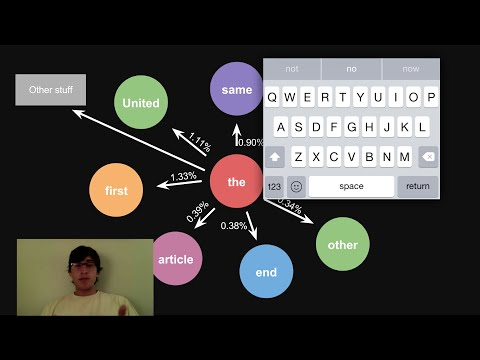

In [5]:
# Markov Chains and Text Generation
from IPython.display import YouTubeVideo
YouTubeVideo('56mGTszb_iM', width = 550)

Markov Chains is a probability-based mathematical model widely used in tasks such as text generation. It uses the previous state to predict the next state. For example, in text generation, Markov chains can be used to predict the next word based on the current word to generate a sentence.

How Markovian ChatBot works:

States and transitions: It treats each word as a state and generates text based on the most likely word after a certain word. This is based on the transition probability between words.
Training model: Through a large corpus (text data), ChatBot learns the transition pattern of words. For example, in a large number of conversations or articles, the model records the most common successor words after each word and the probability of occurrence.
Text generation: When the user enters a sentence, ChatBot will select the next word from the transition probability of the current word based on the learned Markov chain, and then generate a human-like response.

Specific process:

In the training phase, the model scans the text data and counts the words that follow each word to build a transition matrix or dictionary.
In the generation phase, ChatBot uses a word entered by the user as a starting point, and then generates the next word based on the probability of appearing after the word, repeating the process until a complete response is generated.

5. Recreate (or resume) the previous ChatBot session from question "4" above, and now prompt the ChatBot session that you have a couple extensions of the code to show it, and then show it each of the extentions of the "Markovian ChatBot code" below in turn

1.Without just supplying your ChatBot session with the answers, see if the ChatBot can figure out what the extensions in the code do; namely, making character specific Markov chains, and using bigrams (rather than just the previous word alone) dependency... prompt your ChatBot session with some hints if it's not seeming to "get it"
Add Support for N-grams

In [6]:
import random

class MarkovChain:
    def __init__(self):
        self.chain = {}

    def add_word(self, current_word, next_word):
        if current_word not in self.chain:
            self.chain[current_word] = []
        self.chain[current_word].append(next_word)

    def get_next_word(self, current_word):
        if current_word in self.chain:
            return random.choice(self.chain[current_word])
        else:
            return None

# Example of adding words to the chain
mc = MarkovChain()
mc.add_word("hello", "world")
mc.add_word("hello", "everyone")

print(mc.get_next_word("hello"))  # Might print "world" or "everyone"

world


1）To make the generated text more natural, you can consider sequences of words (e.g., bi-grams, tri-grams) rather than just individual words. This way, the bot can remember word combinations and generate more coherent sentences.

2）Add Weighted Probabilities
Currently, you randomly pick the next word from the list of possible next words without considering how often each word follows the current word. You can add weighted probabilities to improve realism.

3）Add Sentence Ending Awareness
To make the chatbot end sentences more naturally, you can treat punctuation marks like periods, exclamations, and question marks as sentence endings.

4）Memory Optimization with Frequency Cutoff
If the dataset is large, your Markov Chain might become too large to fit in memory. You can set a frequency cutoff to only store transitions that occur more than a certain number of times.

2.Interact with your ChatBot session to have it explain details of the code wherever you need help understanding what the code is doing and how it works.

In [10]:
class MarkovChainCharacter:
    def __init__(self):
        self.chains = {}

    def add_to_chain(self, character, current_word, next_word):
        if character not in self.chains:
            self.chains[character] = {}
        if current_word not in self.chains[character]:
            self.chains[character][current_word] = []
        self.chains[character][current_word].append(next_word)

    def get_next_word(self, character, current_word):
        if character in self.chains and current_word in self.chains[character]:
            return random.choice(self.chains[character][current_word])
        else:
            return None

# Example of adding words to character-specific Markov chains
mc = MarkovChainCharacter()
mc.add_to_chain("CharacterA", "hello", "world")
mc.add_to_chain("CharacterB", "hello", "everyone")

print(mc.get_next_word("CharacterA", "hello"))  # Might print "world"
print(mc.get_next_word("CharacterB", "hello"))  # Might print "everyone"

world
everyone


Class structure:

The MarkovChainCharacter class is used to manage each character's own Markov chain.
The word transition rules for each character are stored in the self.chains dictionary.
Main methods:

__init__(): Initialize an empty dictionary to store each character's Markov chain.

add_to_chain(): Add the transition relationship between the current word and the next word for a specific character.

get_next_word(): Randomly get a possible next word for a specific character and the current word.

Function:

Each character has its own independent word chain, which can generate different responses for the same input.
This structure is suitable for dialogue systems, story generation, or games to design unique language patterns or expressions for each character.

Start yet another new ChatBot session and first show the ChatBot the original "Markovian ChatBot code" below, and then tell ChatBot that you have an extension but this time just directly provide it the more complicated final extension without ever providing the intermediate extension code to the ChatBot session and see if it's still able to understand everything extension does; namely, making character specific Markov chains, and using bigrams (rather than just the previous word alone) dependency... prompt the ChatBot with some hints if it's not seeming to understand what you're getting at...

In [12]:
class BigramMarkovChain:
    def __init__(self):
        self.chain = {}

    def add_bigram(self, prev_word, current_word, next_word):
        if (prev_word, current_word) not in self.chain:
            self.chain[(prev_word, current_word)] = []
        self.chain[(prev_word, current_word)].append(next_word)

    def get_next_word(self, prev_word, current_word):
        if (prev_word, current_word) in self.chain:
            return random.choice(self.chain[(prev_word, current_word)])
        else:
            return None

# Example of adding bigrams to the chain
bmc = BigramMarkovChain()
bmc.add_bigram("hello", "world", "today")
bmc.add_bigram("hello", "world", "now")

print(bmc.get_next_word("hello", "world"))  # Might print "today" or "now"

now


1）Bigram:

A bigram is a pair of consecutive words. This code uses the previous word and the current word to predict the next word.

Compared to the standard Markov chain that only relies on the current word, bigrams provide more contextual information, making the prediction more accurate.

Class structure:

The BigramMarkovChain class stores word transition relationships. The key is the bigram of the previous two words (prev_word, current_word), and the value is a list of possible next words.


2）Main methods:

add_bigram(): Add a word transition based on the bigram, recording the current bigram and its subsequent possible words.

get_next_word(): Randomly select the next word based on the given bigram.
    

3）Function:

When querying the bigram (hello, world), the code may randomly return today or now, showing a variety of possible results.

By using bigrams, contextual information is better preserved and the generated text is more coherent.


4）Application:

Text generation: Applicable to generating natural language text that needs to consider context.

Dialogue systems: Generate more coherent responses in chatbots.
Story or sentence completion: Helps generate more reasonable word order and sentences.
In summary, the bigram-based Markov chain expands the scope of context and improves the naturalness and coherence of generated text.

6. Report on your experience interacting with ChatBots to understand the Monte Hall problem and "Markovian ChatBot" code

1）ChatBot’s performance in solving Monte Hall problems and “Markov ChatBot” code

Monte Hall Problem: ChatBot provided clear explanations and helped me better understand the core concepts of this problem through simulations and probabilistic analysis. It quickly grasped the key points of the problem and provided relevant code and algorithms, showing how to solve the problem through programmatic simulation.

Markov Chain Code: ChatBot’s detailed explanations of the code, especially in the extension section, helped me understand how to build and extend Markov chain models. In particular, when dealing with character-specific Markov chains and bigrams, ChatBot provided helpful code examples and explanations to help me understand these concepts more deeply.

2）Frustration in Interaction

ChatBot was able to respond effectively to most questions during the problem-solving process, but sometimes provided lengthy or irrelevant information, which led to a decrease in the efficiency of problem solving. In particular, when specific and short answers were required, ChatBot’s responses were sometimes too detailed or complex, resulting in repeated communication to obtain a clear solution. This caused some frustration, especially when I expected a quick and concise answer.

When dealing with code errors, ChatBot provides useful debugging suggestions and error analysis, but sometimes its suggestions need to be further filtered and adjusted before they can be applied to the actual problem. In this case, although it is helpful, it may also feel inefficient and require more manual intervention to adjust the solution.

3）Overall usefulness evaluation of ChatBot

Pros: ChatBot is very useful as a tool for understanding and debugging code. It can quickly provide detailed explanations about the function and logic of the code, especially when it comes to complex algorithms and mathematical concepts. ChatBot is an extremely useful resource for tasks that require explanations of basic concepts, sample code, and debugging suggestions.

Cons: Although ChatBot provides great help in solving most problems, in certain cases, it may provide too much information or lack precision, resulting in more time to understand and filter useful information. Especially when the problem requires a specific solution, ChatBot's general answers are sometimes not enough.

7. Reflect on your experience interacting with ChatBot and describe how your perception of AI-driven assistance tools in the context of learning coding, statistics, and data science has been evolving (or not) since joining the course

When I first used chatbot, I found that it solved problems very quickly and responded quickly. It didn’t take much guidance to lock in the correct answer, but it was still a tool to assist learning. If I copied it without understanding, I would still get nothing. So thinking for myself is irreplaceable.

During the learning process, chatbot can help me understand complex concepts and give clear code examples and explain the reasons. This is very effective and greatly improves my learning efficiency, especially debugging code and checking code errors.

8. ChatBots consume text data available on the web or platforms, and thus represents a new way to "search consensensus" that condenses and summarizes mainstream human thought

1)Programming and Scripting Skills: Master Python and R programming languages, and be proficient in SQL for database queries, as well as data processing libraries such as Pandas and NumPy.

Mathematics and Statistics: Understand probability, statistics, linear algebra, and calculus, especially when applied to machine learning algorithms.

Data Wrangling and Exploration: Ability to clean and preprocess data, and be able to use tools for data exploration and visualization.

Machine Learning and Modeling: Master supervised and unsupervised learning algorithms, and understand model evaluation techniques.

Big Data Technology: Familiarity with Hadoop, Spark, and cloud platforms such as AWS and Google Cloud for processing large-scale data.

Communication Skills: Ability to tell data stories and communicate analysis results through visualization tools.
Industry Knowledge: Understand the context of the industry you are in to help solve problems and understand data.
Problem Solving and Critical Thinking: Ability to solve problems creatively, especially when faced with incomplete data.

Ethics and Data Privacy: Comply with data privacy laws and handle data in an ethical manner.

2)Traditional Statistician Role: Traditionally, statisticians focus on theory, data collection, and hypothesis testing, often analyzed through tools such as SPSS, Minitab, or Excel, without the need for complex programming skills.

Trends in Modern Statistics: As the amount of data increases, statisticians are increasingly dealing with large-scale data, which often requires programming in R or Python. Although many tools still do not require in-depth programming, basic programming skills are becoming increasingly important.

Benefits of Basic Programming Skills: Although in-depth programming is not required, knowing the basics of R or Python can improve work efficiency and support data processing and results sharing.

Focus on theory: If you focus on theoretical research or teaching, programming skills may not be a core requirement, but knowing programming can provide flexibility for the application of advanced statistical techniques.

3)Summary
Essential Skills for a Data Scientist:

Programming: Proficiency in languages like Python, R, and SQL, along with libraries like Pandas and NumPy.

Mathematics & Statistics: Knowledge of probability, statistics, linear algebra, and calculus is key.

Data Wrangling & Exploration: Skills in cleaning, processing, and visualizing data are essential.

Machine Learning: Understanding algorithms, model evaluation, and techniques is important.

Big Data & Cloud: Familiarity with Hadoop, Spark, and cloud platforms like AWS or Google Cloud.

Communication: Ability to explain complex data insights to non-technical stakeholders.

Domain Knowledge: Industry-specific knowledge enhances contextual understanding.

Problem-Solving & Ethics: Critical thinking and ethical data handling are important in the field.

Becoming a Statistician Without Deep Programming Knowledge:

It is possible to become a statistician without deep programming knowledge, especially with tools like SPSS or Excel.

However, basic programming skills in R or Python are increasingly important in modern statistics, especially for handling large datasets and automating tasks.

Traditional roles may not require heavy coding, but having some knowledge opens up more opportunities and improves efficiency.

4)In the process of interacting with ChatBot, I gradually deepened my understanding of my future career development. ChatBot's quick feedback and automated processing capabilities made me realize the importance of data analysis and programming. For my career development, I think programming skills and statistical analysis will be indispensable tools. Through conversations with ChatBot, I have a clearer understanding that to become a data scientist or statistician, not only a solid mathematical foundation is required, but also the practical application of programming languages ​​such as Python and R.

In addition, ChatBot's automation capabilities made me understand that in the future work environment, proficiency in the use of automation tools will help me process data and make decisions more efficiently. Therefore, I plan to cultivate these technologies through more practices and projects, and improve my abilities through continuous interaction with the tools.

5)In my interactions with ChatBot, I found that its strengths lie in its quick responses and highly summarized information. It can quickly summarize important concepts and help me identify the key points of certain complex problems. However, the limitation of ChatBot is that it lacks in-depth industry background knowledge, especially for complex problems in specific fields, its answers are often not detailed enough.

Next, I plan to combine ChatBot's feedback with deeper learning resources, especially after ChatBot provides summary information, I will use books, literature or professional courses to further study the details and industry knowledge of the problem. In addition, I will continue to use ChatBot to get quick concept summaries and basic knowledge help, but at the same time pay more attention to cultivating my ability to analyze and solve complex problems independently.

9. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

Yes.

ChatGpt told me I can't share the link, and when I do it gives me an error and the screen goes all white and tells me an error has occurred, so I pasted the summary in a Google Doc. link:https://docs.google.com/document/d/1QRvVGcIba77k3jgn5FYtOOoToGYxW1Ik-QojY1ejA3k/edit?hl=zh-cn

Summary:

Markovian ChatBot Code: We explored a Markov Chain-based chatbot, where the next word is generated based on the current word. The first version of the code was analyzed, and a more streamlined version was suggested, including improvements like n-grams (using sequences of words), weighted probabilities, and handling sentence-ending punctuation for more natural text generation.

Character-Specific Markov Chain: You introduced a Markov Chain implementation where different characters have their own separate word chains. This allows different characters to generate text or respond differently based on their own unique word transitions.

Bigram Markov Chain: You extended the Markov Chain by introducing bigrams, where two consecutive words (a bigram) are used to predict the next word. This gives the model more context for generating text, improving coherence and variety.

In each case, we discussed the advantages of adding more context (through bigrams, n-grams, or character-specific chains), weighted probabilities, and punctuation handling to improve the realism and coherence of generated text.

Essential Skills for a Data Scientist:

Programming: Proficiency in languages like Python, R, and SQL, along with libraries like Pandas and NumPy.

Mathematics & Statistics: Knowledge of probability, statistics, linear algebra, and calculus is key.

Data Wrangling & Exploration: Skills in cleaning, processing, and visualizing data are essential.

Machine Learning: Understanding algorithms, model evaluation, and techniques is important.

Big Data & Cloud: Familiarity with Hadoop, Spark, and cloud platforms like AWS or Google Cloud.

Communication: Ability to explain complex data insights to non-technical stakeholders.

Domain Knowledge: Industry-specific knowledge enhances contextual understanding.

Problem-Solving & Ethics: Critical thinking and ethical data handling are important in the field.
Becoming a Statistician Without Deep Programming Knowledge:

It is possible to become a statistician without deep programming knowledge, especially with tools like SPSS or Excel.

However, basic programming skills in R or Python are increasingly important in modern statistics, especially for handling large datasets and automating tasks.

Traditional roles may not require heavy coding, but having some knowledge opens up more opportunities and improves efficiency.

